
# Face Recognition

In [1]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

#Loads the VGG16 model 
model = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

Using TensorFlow backend.


In [2]:
for i,layers in enumerate(model.layers):
    layers.Trainable=False
    print(layers.Trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [3]:
for i,layers in enumerate(model.layers):
    print(str(i)+" "+ layers.__class__.__name__, layers.Trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [4]:
def addTopModel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [5]:
model.input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [6]:
model.layers

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

num_classes = 1

FC_Head = addTopModel(model, num_classes)

modelnew = Model(inputs=model.input, outputs=FC_Head)

print(modelnew.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'C:/Users/Ajay/Mlops/Sahil_Image'
validation_data_dir = 'C:/Users/Ajay/Mlops/Sahil_image2'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 779 images belonging to 1 classes.
Found 219 images belonging to 1 classes.


In [19]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("sahil.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
modelnew.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 780
nb_validation_samples = 219
epochs = 2
batch_size =32 

history = modelnew.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

modelnew.save("sahil.h5")

Epoch 1/2
24/24 [==============================] - 528s 22s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to sahil.h5
Epoch 2/2
24/24 [==============================] - 519s 22s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 0.00000


In [20]:
    train_generator.class_indices


{'Sahil': 0}

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
m=load_model("sahil.h5")

In [3]:
from keras.preprocessing import image

In [4]:
import cv2

In [94]:
cap=cv2.VideoCapture(0)
_,i=cap.read()
cv2.imwrite("test1.jpg",i)

True

In [95]:
cap.release()

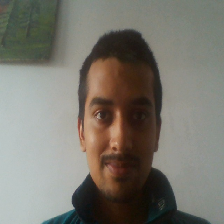

In [96]:
Test_image=image.load_img("test1.jpg",target_size=(224,224,3))

Test_image

In [62]:
Test_image=image.img_to_array(Test_image)
import numpy as np
final=np.expand_dims(Test_image,axis=0)

In [79]:
result=m.predict(final)


In [78]:
result

array([[0.]], dtype=float32)

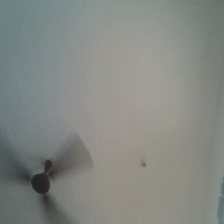

In [52]:
cap=cv2.VideoCapture(0)
_,i=cap.read()
cv2.imwrite("test2.jpg",i)
cap.release()
Test_image=image.load_img("test2.jpg",target_size=(224,224,3))
Test_image

In [74]:

Test_image=image.img_to_array(Test_image)
final=np.expand_dims(Test_image,axis=0)
result=m.predict(final)

In [75]:
result

array([[1.]], dtype=float32)

In [69]:
Test_image=image.load_img("C:/Users/Ajay/Mlops/Sahil_Image/Sahil/sahil900.jpg",target_size=(224,224,3))
Test_image
Test_image=image.img_to_array(Test_image)
final=np.expand_dims(Test_image,axis=0)
result=m.predict(final)

In [32]:
result

array([[1.]], dtype=float32)